In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mapalign.embed import DiffusionMapEmbedding
import numpy as np
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cluster import KMeans

In [2]:
def compare_methods(X, title, cluster=None):
    f, axarr = plt.subplots(2, 7, sharex=True, sharey=True, figsize=(15, 5))
    for idx, t in enumerate([0, 0.1, 1, 10, 100, 250, 1000]):
        de = DiffusionMapEmbedding(alpha=0.5, diffusion_time=t, affinity='markov',
                                   n_components=10).fit_transform(X.copy())
        ed = (de - de[0, :])
        ed = np.sqrt(np.sum(ed * ed , axis=1))
        ed = ed/max(ed)
        if cluster is not None:
            ed = KMeans(n_clusters=cluster).fit(de).labels_
        plt.axes(axarr[0][idx])
        if cluster is not None: 
            plt.scatter(X[:, 0], X[:, 1], c=ed, cmap=plt.cm.Set1, linewidths=0)
        else:
            plt.scatter(X[:, 0], X[:, 1], c=ed, cmap=plt.cm.Spectral, linewidths=0)
        plt.axis('tight')
        if cluster is None:
            plt.colorbar()
        plt.title('t={:g}'.format(t))
    for idx, c in enumerate([2, 3, 4, 5, 10, 20, 50]):
        se = SpectralEmbedding(n_components=c).fit_transform(X.copy())
        ed = (se - se[0, :])
        ed = np.sqrt(np.sum(ed * ed , axis=1))
        ed = ed/max(ed)
        if cluster is not None:
            ed = KMeans(n_clusters=cluster).fit(ed[:, None]).labels_
        plt.axes(axarr[1][idx])
        if cluster is not None: 
            plt.scatter(X[:, 0], X[:, 1], c=ed, cmap=plt.cm.Set1, linewidths=0)
        else:
            plt.scatter(X[:, 0], X[:, 1], c=ed, cmap=plt.cm.Spectral, linewidths=0)
        plt.axis('tight')
        if cluster is None:
            plt.colorbar()
        plt.title('num_c=%d' % (c))
    ph = plt.suptitle(title)

In [3]:
n=2000
t=np.power(np.sort(np.random.rand(n)), .7)*10
al=.15;bet=.5;
x1=bet * np.exp(al * t) * np.cos(t) + 0.1 * np.random.randn(n)
y1=bet * np.exp(al * t) * np.sin(t) + 0.1 * np.random.randn(n)
X = np.hstack((x1[:, None], y1[:, None]))

### Plot original data with the t parameter corresponding to color

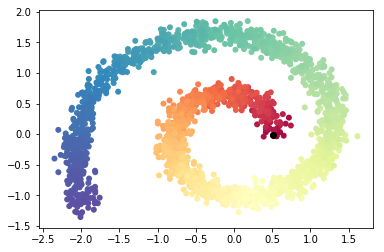

In [4]:
plt.scatter(x1, y1, c=t, cmap=plt.cm.Spectral, linewidths=0)
ph = plt.plot(x1[0], y1[0], 'ko')

### Compare diffusion embedding to spectral embedding (row 2)

In the case of diffusion embedding the diffusion time is being modified, while the number of components are being modified for spectral embedding. In the case of spectral embedding we are either using the default affinity (row 2).

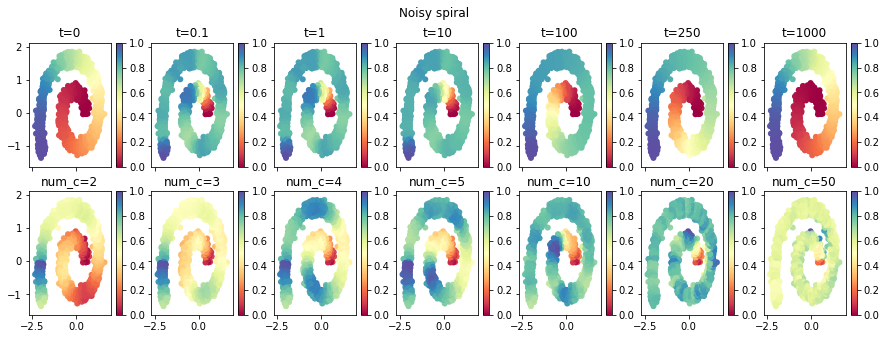

In [5]:
compare_methods(X, 'Noisy spiral')

In [6]:
def make_circles(n_samples=100, shuffle=True, noise=None, random_state=None,
                 factors=[.8, 1.5, 2]):
    """Make a large circle containing a smaller circle in 2d.

    A simple toy dataset to visualize clustering and classification
    algorithms.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.

    shuffle: bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    factor : double < 1 (default=.8)
        Scale factor between inner and outer circle.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """

    # so as not to have the first point = last point, we add one and then
    # remove it.
    linspace = np.linspace(0, 2 * np.pi, n_samples + 1)[:-1]
    base_circ_x = np.cos(linspace)
    base_circ_y = np.sin(linspace)
    factor = factors[0]
    X = np.hstack(((factor * base_circ_x)[:, None], (factor * base_circ_y)[:, None]))
    y = np.zeros(n_samples)
    for idx, factor in enumerate(factors[1:]):
        inner_circ_x = base_circ_x * factor
        inner_circ_y = base_circ_y * factor
        X = np.vstack((X, np.hstack(((factor * base_circ_x)[:, None], (factor * base_circ_y)[:, None]))))
        y = np.hstack([y, (idx + 1) * np.ones(n_samples)])

    if not noise is None:
        X += np.random.normal(scale=noise, size=X.shape)

    return X, y

### Plot the noisy circles

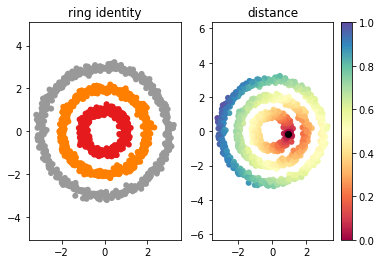

In [7]:
n_samples = 500
X, y = make_circles(n_samples=n_samples, factors=[1, 2, 3], noise=.1)
ed = (X - X[0, :])
ed = np.sqrt(np.sum(ed * ed , axis=1))
ed = ed/max(ed)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, linewidths=0)
plt.axis('tight')
plt.axis('equal')
plt.title('ring identity')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=ed, cmap=plt.cm.Spectral, linewidths=0)
plt.axis('tight')
plt.axis('equal')
plt.title('distance')
plt.colorbar()
ph = plt.plot(X[0, 0], X[0, 1], 'ko')

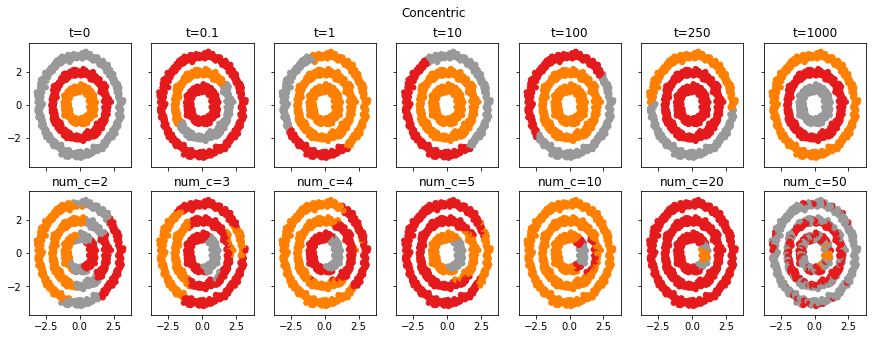

In [8]:
compare_methods(X, 'Concentric', cluster=3)